<h1>Bathymetry at Duck FRF During DUNEX</h1>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
%matplotlib widget

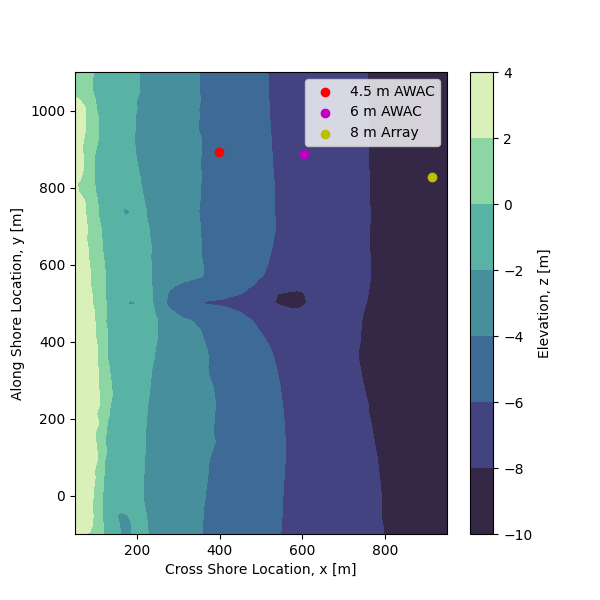

In [26]:
  # Add the FRF Bathymetry to the map 
# Data from September 28th, 2021
# bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)
# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# Fixed Instrument Locations
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations

# Plot the Bathymetry 
fig_bathy, ax = plt.subplots(figsize=(6,6))
im = ax.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
ax.set_xlabel('Cross Shore Location, x [m]')
ax.set_ylabel('Along Shore Location, y [m]')
cbar = fig_bathy.colorbar(im)
cbar.ax.set_ylabel('Elevation, z [m]')

# Plot the Location of the 4.5 m AWAC, 6 m AWAC and 8 m Array and Pier
ax.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
ax.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax.legend()

# Save the Figure 
fig_bathy.savefig('FRFBathy.png')